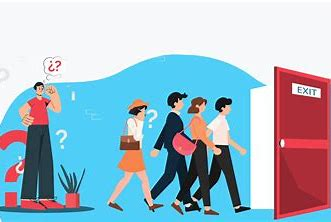

In [35]:
from IPython.display import Image
from IPython.display import display
display(Image(filename="/content/OIP (1).jpeg",height=500,width=900))

This is the dataset of a U.S. bank customer for getting the information that , this particular customer will leave bank or not.

In [61]:
#import necessory liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [62]:
#read data set    #It is the dataset of a U.S. bank customer for getting the information that , this particular customer will leave bank or not.
df=pd.read_csv("/content/Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [63]:
#First 5 rows of the dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [64]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [65]:
# information about the total number of rows, the number of non-null values in each column, and the data type of each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [66]:
# generate a statistical summary of the DataFrame
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [67]:
#Non-value checking
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [68]:
#Row and Column count
print("column count: ",df.shape[1])
print("Row Count: ",df.shape[0])

column count:  14
Row Count:  10000


In [69]:
#data types
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [70]:
# drop unnececcery columns
df.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [71]:
df1=df['Geography'].value_counts()
df1

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

<Axes: xlabel='Geography', ylabel='count'>

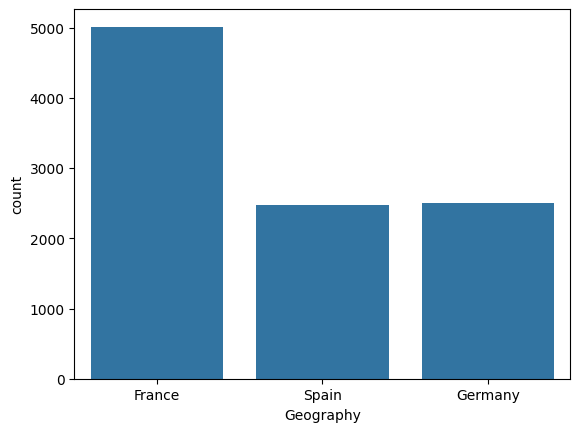

In [72]:
sns.countplot(x='Geography',data=df)

Male      5457
Female    4543
Name: Gender, dtype: int64
Axes(0.125,0.11;0.775x0.77)


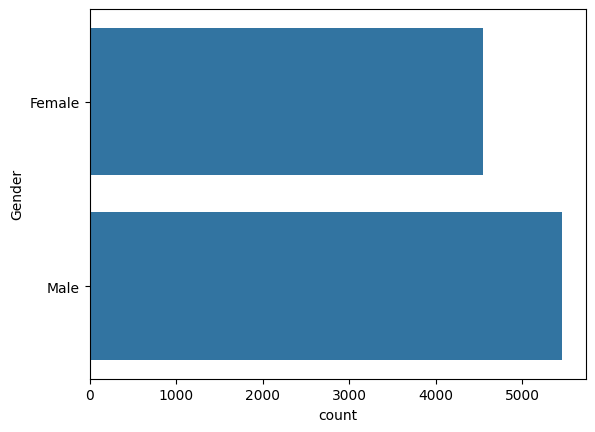

In [73]:
print(df['Gender'].value_counts())
print(sns.countplot(y=df['Gender'],data=df))

<Axes: xlabel='Tenure', ylabel='Balance'>

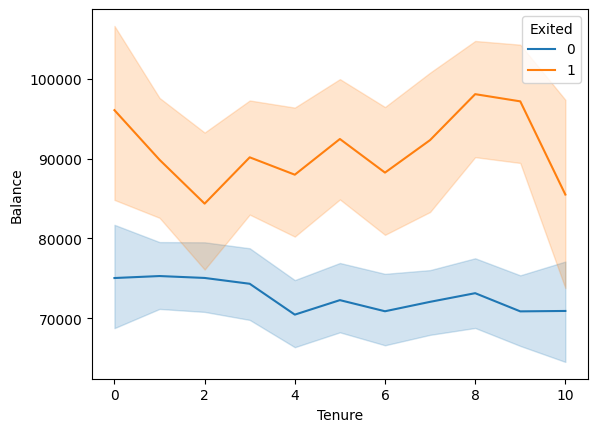

In [74]:
sns.lineplot(x='Tenure',y='Balance',data=df,hue=df.Exited)

In [75]:
# preprocessing data(cleaning and organising)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.Gender=le.fit_transform(df.Gender)
df.Geography=le.fit_transform(df.Geography)

In [76]:
# This code extracts the feature variables and target variable
# input data/feature varible
x=df.iloc[:,:-1].values
x

array([[6.1900000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [6.0800000e+02, 2.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [5.0200000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [7.0900000e+02, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [7.7200000e+02, 1.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [7.9200000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [77]:
y=df.iloc[:,-1].values
y

array([1, 0, 1, ..., 1, 1, 0])

In [78]:
# split the feature variables (x) and target variable (y) into training and testing sets.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train

array([[6.8600000e+02, 0.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.7909326e+05],
       [6.3200000e+02, 1.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.9597886e+05],
       [5.5900000e+02, 2.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 8.5891020e+04],
       ...,
       [7.3500000e+02, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 9.2220120e+04],
       [6.6700000e+02, 0.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 9.7508040e+04],
       [6.9700000e+02, 1.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 5.3581140e+04]])

In [79]:
x_test

array([[5.960000e+02, 1.000000e+00, 1.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 4.178837e+04],
       [6.230000e+02, 0.000000e+00, 1.000000e+00, ..., 1.000000e+00,
        1.000000e+00, 1.463793e+05],
       [6.010000e+02, 2.000000e+00, 0.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 5.856131e+04],
       ...,
       [7.300000e+02, 0.000000e+00, 0.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 3.337326e+04],
       [6.920000e+02, 0.000000e+00, 1.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 7.675599e+04],
       [6.280000e+02, 1.000000e+00, 1.000000e+00, ..., 1.000000e+00,
        1.000000e+00, 1.076743e+05]])

In [80]:
y_train

array([0, 0, 1, ..., 1, 1, 0])

In [81]:
y_test

array([0, 0, 0, ..., 1, 1, 1])

In [82]:
#using RandomforestClassifier to predict the model
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier()
random.fit(x_train,y_train)
ypred=random.predict(x_test)
ypred

array([0, 0, 0, ..., 1, 0, 0])

In [83]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
score=accuracy_score(y_test,ypred)
print("accuracy score:\n ",score)
print("Classification Report:\n ",(y_test,ypred))
print("confusion matrix: \n",(y_test,ypred))

accuracy score:
  0.866
Classification Report:
  (array([0, 0, 0, ..., 1, 1, 1]), array([0, 0, 0, ..., 1, 0, 0]))
confusion matrix: 
 (array([0, 0, 0, ..., 1, 1, 1]), array([0, 0, 0, ..., 1, 0, 0]))


In [84]:
# Visualization
# sns.pairplot(df)

<Axes: xlabel='Geography', ylabel='count'>

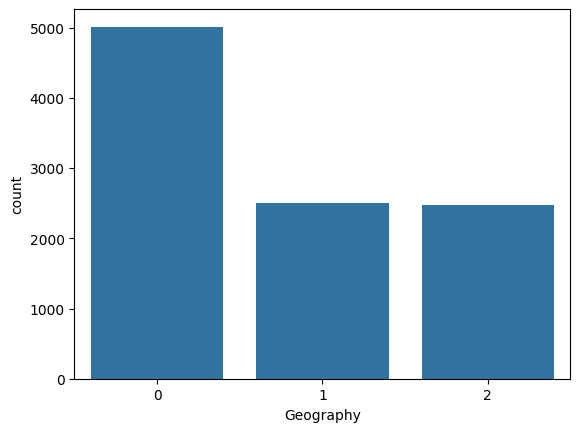

In [86]:
sns.countplot(x='Geography',data=df)

<Axes: xlabel='Gender', ylabel='count'>

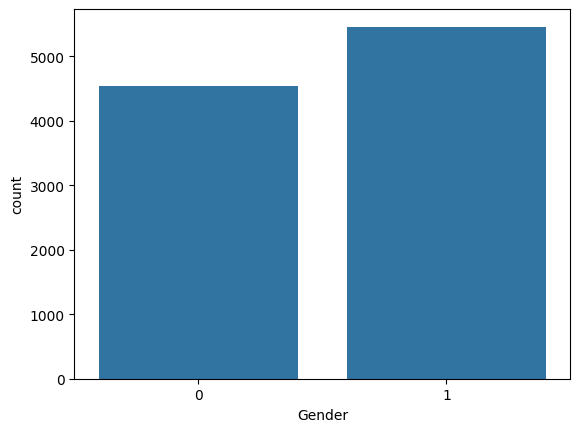

In [87]:
sns.countplot(x='Gender',data=df)

<Axes: xlabel='Tenure', ylabel='Balance'>

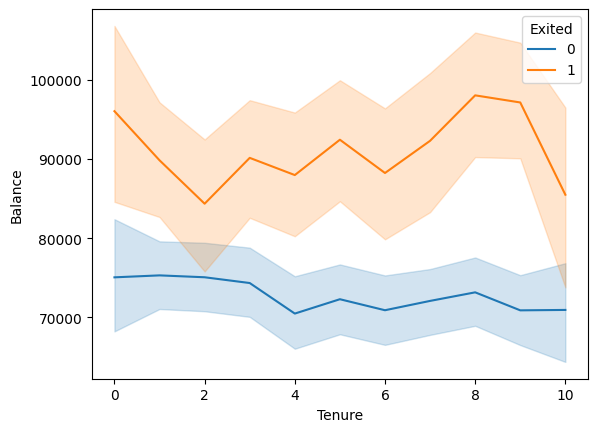

In [88]:
sns.lineplot(x='Tenure',y='Balance',data=df,hue=df.Exited)

<Axes: xlabel='Age', ylabel='Balance'>

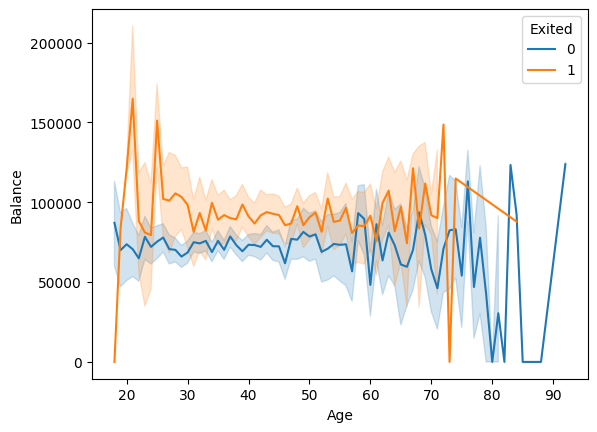

In [89]:
sns.lineplot(x='Age',y='Balance',data=df,hue=df.Exited)

Text(0.5, 1.0, ' Geography graph')

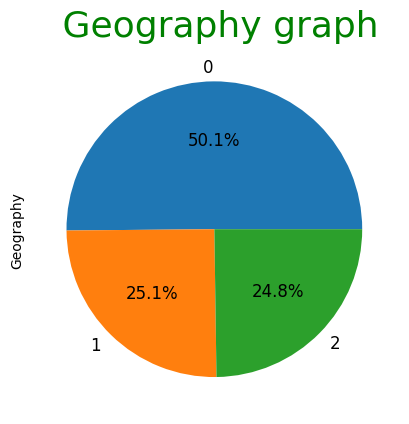

In [90]:
constaction=df['Geography'].value_counts()
constaction.plot(kind='pie',fontsize=12,autopct='%1.1f%%')
plt.title(' Geography graph',color='green',fontsize=26)